In [2]:
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings


pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings('ignore')

In [3]:
# Download the latest version
path = kagglehub.dataset_download("ranjeetshrivastav/fraud-detection-dataset")
print("Extracting files...")
print("Path to dataset files:", path)

# Define the destination directory
destination_path = "/Users/vishakkr/Documents/Classification Models/Data"

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Move the downloaded dataset to the destination directory
for file_name in os.listdir(path):
    shutil.move(os.path.join(path, file_name), os.path.join(destination_path, file_name))

print(f"Files moved to: {destination_path}")

In [4]:
import json
#loading our dataset into 'data'
with open('Data/transactions/transactions.txt') as f:
    data = [json.loads(line) for line in f]
    
# Converting our data to a pandas df called 'transactions'
# import pandas as pd
transactions = pd.DataFrame(data)


In [5]:
transactions.head()


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
transactions.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [10]:
transactions=transactions.replace('', np.nan)

In [11]:
transactions.isnull().sum()[transactions.isnull().sum()>0]

acqCountry               4562
merchantCountryCode       724
posEntryMode             4054
posConditionCode          409
transactionType           698
echoBuffer             786363
merchantCity           786363
merchantState          786363
merchantZip            786363
posOnPremises          786363
recurringAuthInd       786363
dtype: int64

In [12]:
drop_col=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd']
transactions.drop(drop_col, axis=1, inplace=True)

In [13]:
change_to_date=['transactionDateTime', 'currentExpDate', 'accountOpenDate','dateOfLastAddressChange']
for col in change_to_date:
    transactions[col]=pd.to_datetime(transactions[col])

In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  object        
 1   customerId                786363 non-null  object        
 2   creditLimit               786363 non-null  float64       
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                781801 non-null  object        
 8   merchantCountryCode       785639 non-null  object        
 9   posEntryMode              782309 non-null  object        
 10  posConditionCode          785954 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [15]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [17]:
change_to_numeric=['accountNumber', 'customerId', 'creditLimit', 'transactionAmount', 'posEntryMode', 'posConditionCode', 'cardCVV', 'enteredCVV', 'cardLast4Digits','currentBalance']
change_to_bool=['cardPresent','expirationDateKeyInMatch', 'isFraud']

# Convert columns to numeric
for column in change_to_numeric:
    transactions[column] = pd.to_numeric(transactions[column], errors='coerce')  # Converts to numeric, invalid values become NaN

# Convert columns to boolean
for column in change_to_bool:
    transactions[column] = transactions[column].astype(bool)  # Converts to boolean

In [18]:
transactions.duplicated().sum()

0

In [19]:
transactions['merchantCountryCode'].unique()

array(['US', 'CAN', nan, 'PR', 'MEX'], dtype=object)

In [21]:
# Calculate percentage of matching merchantCountryCode and acqCountry
matching_count = (transactions["merchantCountryCode"] == transactions["acqCountry"]).sum()
total_count = len(transactions)
matching_percentage = (matching_count / total_count) * 100

matching_percentage

99.41095906089173

In [22]:
# Fill missing 'merchantCountryCode' where 'acqCountry' is not NA
transactions.loc[transactions['merchantCountryCode'].isna() & transactions['acqCountry'].notna(), 'merchantCountryCode'] = transactions['acqCountry']

# Fill missing 'acqCountry' where 'merchantCountryCode' is not NA
transactions.loc[transactions['acqCountry'].isna() & transactions['merchantCountryCode'].notna(), 'acqCountry'] = transactions['merchantCountryCode']

transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [23]:
transactions['acqCountry'].value_counts()

acqCountry
US     778513
MEX      3146
CAN      2433
PR       1550
Name: count, dtype: int64

In [24]:
transactions['merchantCountryCode'].value_counts()

merchantCountryCode
US     778514
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64

In [25]:
# Calculate the mode of 'merchantCountryCode'
merchant_mode = transactions['merchantCountryCode'].mode()[0]
merchant_mode = transactions['acqCountry'].mode()[0]

# Fill missing values in 'merchantCountryCode' with the mode
transactions['merchantCountryCode'].fillna(merchant_mode, inplace=True)
transactions['acqCountry'].fillna(merchant_mode, inplace=True)

In [26]:
zero_transaction=transactions[transactions['transactionAmount']==0]
zero_transaction.head()

In [27]:
transactions.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                     0
merchantCountryCode            0
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [28]:
zero_transaction['transactionType'].value_counts(normalize=True)

transactionType
ADDRESS_VERIFICATION    0.907492
PURCHASE                0.066772
REVERSAL                0.025737
Name: proportion, dtype: float64

In [29]:
# 90% of the zero transaction amount are for address verification, so with this, we can fill the null values in transactionType with transactionAmount as 0 with ADDRESS_VERIFICATION

In [30]:
zero_transaction['transactionType'].isnull().sum()

0

In [31]:
#We find the mode for the columns and fill the other NA values with it
transaction_type_mode = transactions['transactionType'].mode()[0]
transactions['transactionType'] = transactions['transactionType'].fillna(transaction_type_mode)

In [32]:
transactions.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                     0
merchantCountryCode            0
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType                0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [33]:
transactions['posEntryMode'].fillna(transactions['posEntryMode'].mode()[0])
transactions['posConditionCode'].fillna(transactions['posConditionCode'].mode()[0])
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [34]:
transactions.duplicated().sum()

0

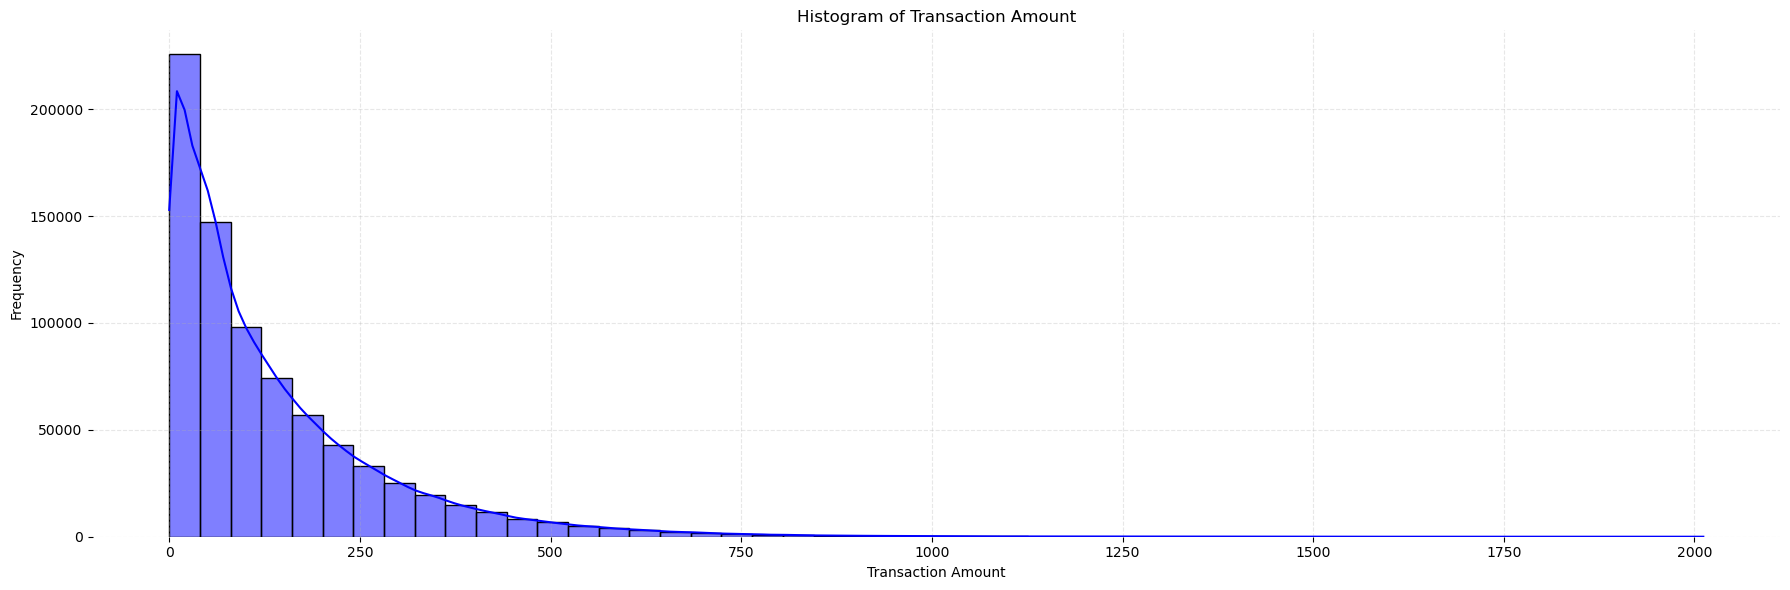

In [35]:
plt.figure(figsize=(18,6))
sns.histplot(transactions['transactionAmount'], bins=50, kde=True, color='blue')

plt.title('Histogram of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', alpha=0.3)

# Remove the border by hiding all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.tight_layout()
plt.show()


In [36]:
#  Each bin size is 0-40$, Majority of the transfactions are between 0-120$, while the most of them between 0-80$

In [37]:
transactions['transactionAmount'].describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

In [38]:
transactionAmount_mean=transactions['transactionAmount'].mean()
transactionAmount_std=transactions['transactionAmount'].std()
# Calculate the ranges
range_68 = (transactionAmount_mean - transactionAmount_std, transactionAmount_mean + transactionAmount_std)
range_95 = (transactionAmount_mean - 2 * transactionAmount_std, transactionAmount_mean + 2 * transactionAmount_std)
range_99_7 = (transactionAmount_mean - 3 * transactionAmount_std, transactionAmount_mean + 3 * transactionAmount_std)

# Print the ranges
print(f"68% of data lies between: {range_68}")
print(f"95% of data lies between: {range_95}")
print(f"99.7% of data lies between: {range_99_7}")

68% of data lies between: (-10.739778067980524, 284.7113599709947)
95% of data lies between: (-158.46534708746813, 432.43692899048233)
99.7% of data lies between: (-306.1909161069558, 580.1624980099699)


In [39]:
# We can see 68% of the transactiton amount <285$, while 95% of the transactiton amount <432$. 

In [40]:
transactions[['creditLimit', 'availableMoney','transactionAmount','currentBalance']].describe()

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [41]:
# Available Money: The average available money in an account is $6250.73, which is nearly double the median value of $3184.86. This suggests that the distribution is right-skewed, with some accounts having significantly higher available money.
# Credit Limit: The average credit limit is $10,759.46, which aligns with the expected distribution based on the quartiles.
# Transaction Amount: The average transaction amount is $136.99, suggesting that most transactions are small to moderate in value.
# Current Balance: The average current balance is $4508.74, indicating that on average, accounts maintain a reasonable balance compared to their credit limits.

In [42]:
purchase_transaction=transactions[transactions['transactionType']=='PURCHASE']

most_merchant_money_spent=purchase_transaction.groupby('merchantName').agg({'transactionAmount':'sum'}).reset_index().sort_values(by='transactionAmount', ascending=False).head()
most_category_money_spent=purchase_transaction.groupby('merchantCategoryCode').agg({'transactionAmount':'sum'}).reset_index().sort_values(by='transactionAmount', ascending=False).head()

# Extract the year and month as a new column for grouping
transactions['year_month'] = transactions['transactionDateTime'].dt.to_period('M')

# Group by 'year_month' and calculate the number of transactions and the total amount spent
monthly_summary = transactions.groupby('year_month').agg(
    transaction_count=('transactionAmount', 'size'),   # Count of transactions
    total_spent=('transactionAmount', 'sum')          # Total amount spent
).reset_index()

<Axes: xlabel='merchantName', ylabel='transactionAmount'>

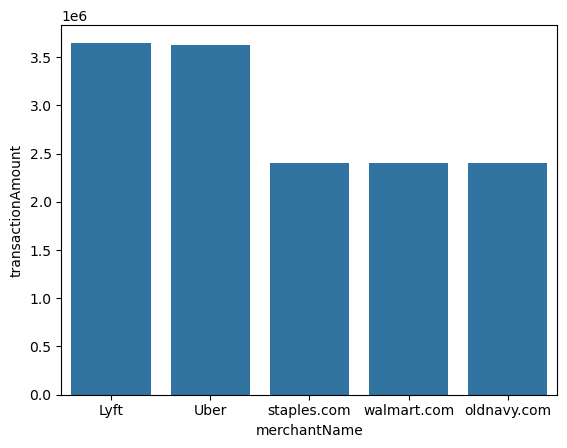

In [43]:
sns.barplot(data=most_merchant_money_spent, x='merchantName',y='transactionAmount')

<Axes: xlabel='merchantCategoryCode', ylabel='transactionAmount'>

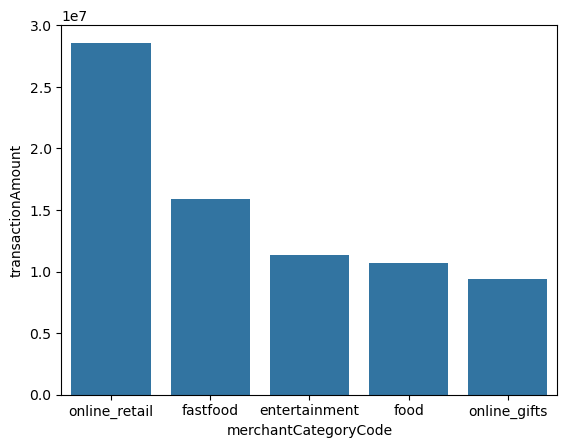

In [44]:
sns.barplot(data=most_category_money_spent, x='merchantCategoryCode',y='transactionAmount')

<Axes: xlabel='year_month', ylabel='transaction_count'>

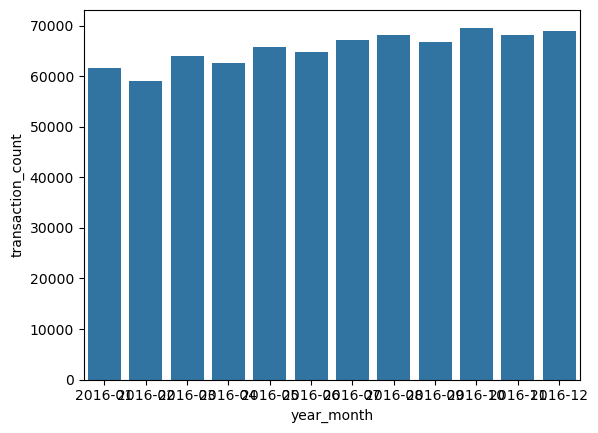

In [45]:
sns.barplot(data=monthly_summary, x='year_month',y='transaction_count')

<Axes: xlabel='year_month', ylabel='total_spent'>

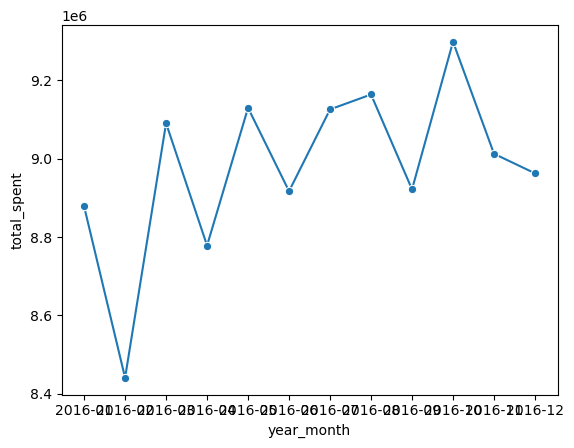

In [46]:
# Convert 'year_month' to datetime (if it's a Period object)
monthly_summary['year_month'] = monthly_summary['year_month'].astype(str)
sns.lineplot(data=monthly_summary, x='year_month', y='total_spent', marker='o')


In [47]:
# Since there is a lot of skewness in the data, we will check of outliers. 

In [48]:
# Identify outliers using the IQR rule
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outlier_indices[column] = outliers.tolist()
        
        print(f"Column: {column}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}\n")

    return outlier_indices

# Columns to check
columns_to_check = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Detect outliers
outliers = detect_outliers_iqr(transactions, columns_to_check)


Column: creditLimit
Lower bound: -10000.0, Upper bound: 30000.0
Number of outliers: 48781

Column: availableMoney
Lower bound: -8556.449999999999, Upper bound: 17133.87
Number of outliers: 58834

Column: transactionAmount
Lower bound: -203.09499999999997, Upper bound: 428.22499999999997
Number of outliers: 40700

Column: currentBalance
Lower bound: -6211.8675, Upper bound: 12192.872500000001
Number of outliers: 69603



In [49]:
fraudulent_transactions=transactions[transactions['isFraud']==True]
fraudulent_transactions['transactionAmount'].describe()

count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64

In [50]:
# There are 12,417 fraudulent transactions in the dataset, The average transaction amount for fraudulent transactions is approximately $225.22. This suggests that most fraudulent transactions are relatively small or moderate in value, which may be an attempt to avoid detection.

# 75% of the fraudulent transactions have a transaction amount below $311.46.

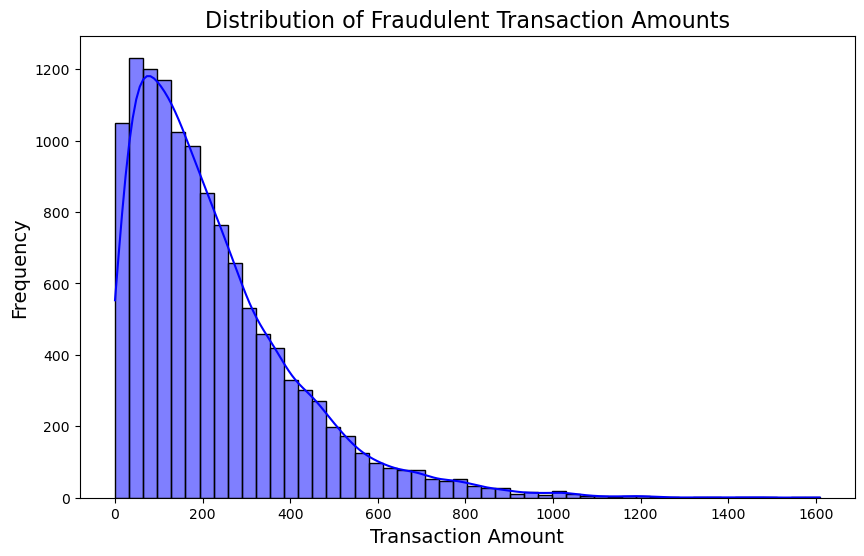

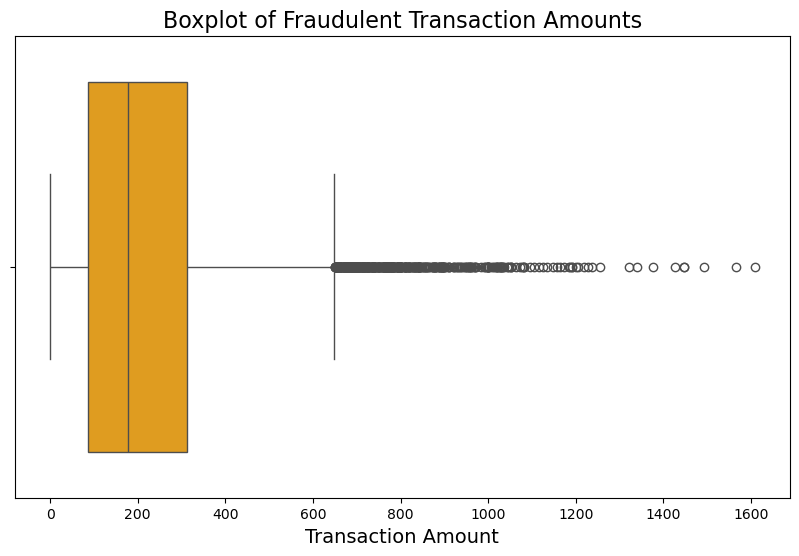

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['transactionAmount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=fraudulent_transactions['transactionAmount'], color='orange')
plt.title('Boxplot of Fraudulent Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.show()


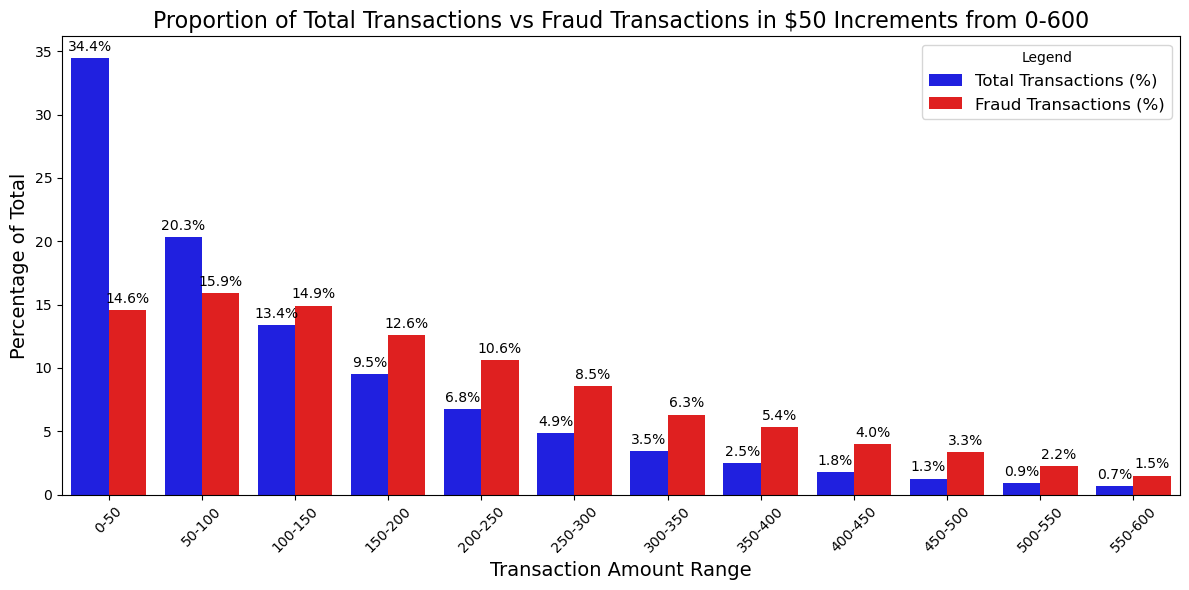

In [52]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300',
          '300-350', '350-400', '400-450', '450-500', '500-550', '550-600']
transactions['amount_range'] = pd.cut(transactions['transactionAmount'], bins=bins, labels=labels, right=False)

grouped_data = transactions.groupby('amount_range').agg(total_transactions=('transactionAmount', 'size'),total_fraud=('isFraud', 'sum')).reset_index()

#Normalize total transactions and frauds as percentages of their totals
total_transactions_sum = grouped_data['total_transactions'].sum()
total_fraud_sum = grouped_data['total_fraud'].sum()

grouped_data['transactions_percentage'] = (grouped_data['total_transactions'] / total_transactions_sum) * 100
grouped_data['fraud_percentage'] = (grouped_data['total_fraud'] / total_fraud_sum) * 100

# Prepare data for side-by-side bar plot
melted_data = grouped_data.melt(
    id_vars=['amount_range'], 
    value_vars=['transactions_percentage', 'fraud_percentage'],
    var_name='Type', 
    value_name='Percentage'
)

# Map the column names to friendly labels for the legend
type_mapping = {
    'transactions_percentage': 'Total Transactions (%)',
    'fraud_percentage': 'Fraud Transactions (%)'
}
melted_data['Type'] = melted_data['Type'].map(type_mapping)

# Plot the side-by-side bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=melted_data,
    x='amount_range',
    y='Percentage',
    hue='Type',
    palette=['blue', 'red']
)

# Annotate each bar with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=10, padding=3)

# Customize the plot
plt.title('Proportion of Total Transactions vs Fraud Transactions in $50 Increments from 0-600', fontsize=16)
plt.xlabel('Transaction Amount Range', fontsize=14)
plt.ylabel('Percentage of Total', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Legend', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [53]:
fraudulent_transactions['cardPresent'].value_counts(normalize=True)


cardPresent
False    0.721752
True     0.278248
Name: proportion, dtype: float64

In [54]:
fraudulent_transactions['posEntryMode'].value_counts(normalize=True)
# Needto explain each code 

posEntryMode
9.0     0.465838
2.0     0.281610
5.0     0.202173
90.0    0.030622
80.0    0.019756
Name: proportion, dtype: float64

In [55]:
fraudulent_transactions['posConditionCode'].value_counts(normalize=True)

posConditionCode
1.0     0.825333
8.0     0.156192
99.0    0.018475
Name: proportion, dtype: float64

In [56]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,year_month,amount_range
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08,50-100
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10,50-100
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11,0-50
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12,0-50
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03,50-100


In [57]:
df=transactions.copy()
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,year_month,amount_range
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08,50-100
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10,50-100
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11,0-50
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12,0-50
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03,50-100


In [58]:
df=df.sort_values(by=['accountNumber', 'merchantName', 'transactionAmount', 'transactionDateTime']).reset_index(drop=True)

In [59]:
#calculate time differences within each group of (accountNumber, merchantName, transactionAmount)
df['time_diff'] = df.groupby(['accountNumber', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff()

In [60]:
#make a new column to find rows where the transactionType is 'REVERSAL'
df['is_reversal'] = df['transactionType'] == 'REVERSAL'


In [61]:
# identify duplicate or repeated transactions for the same account at the same merchant with the same amount.
group_sizes=df.groupby(['accountNumber', 'merchantName', 'transactionAmount']).size()

In [62]:
two_transaction_groups = group_sizes[group_sizes == 2].index

In [63]:
two_transaction_groups

MultiIndex([(100088067,              'AMC #79863',  22.32),
            (100088067,           'Fresh Flowers', 411.35),
            (100328049,                    'Lyft',  43.74),
            (100328049,       'McDonalds #423357', 284.97),
            (100737756,        '34th BBQ #166379',  43.25),
            (100737756,        '34th BBQ #436606',  93.67),
            (100737756,     'Best Bistro #262998', 501.29),
            (100737756,     'Boston Cafe #465229',  522.2),
            (100737756, 'South Steakhouse #73819', 211.22),
            (101132326,    'Regal Cinemas #05791', 188.86),
            ...
            (999257059,        'Wall Street News',  47.58),
            (999257059,         'Washington Post',  87.68),
            (999257059,        'Washington Times', 557.11),
            (999258704,                    'Uber',   6.71),
            (999258704,                    'Uber', 367.13),
            (999258704,               'apple.com',   6.28),
            (999258704, 

In [64]:
group_sizes.head()

accountNumber  merchantName               transactionAmount
100088067      1st BBQ                    200.12               1
               1st Pub                    95.11                1
               1st Sandwitch Bar #758805  5.26                 1
               34th BBQ #412895           141.60               1
               AMC #191138                304.15               1
dtype: int64

In [65]:
df['in_two_transaction_group'] = df.set_index(['accountNumber', 'merchantName', 'transactionAmount']).index.isin(two_transaction_groups)


In [66]:
reversal_mask = (df['in_two_transaction_group'] & df['is_reversal'] & (df['time_diff'] > pd.Timedelta(minutes=10)))


In [67]:
#lwts make a reversal df with both transaction times
reversal_df = df[df['in_two_transaction_group']].groupby(['accountNumber', 'merchantName', 'transactionAmount']).agg(transactionTimes=('transactionDateTime', list),transactionTypes=('transactionType', list)).reset_index()


In [68]:
reversal_df.head()

,accountNumber,merchantName,transactionAmount,transactionTimes,transactionTypes
0,100088067,AMC #79863,22.32,"[2016-11-20 07:57:05, 2016-11-20 08:00:04]","[PURCHASE, REVERSAL]"
1,100088067,Fresh Flowers,411.35,"[2016-10-16 18:01:00, 2016-10-16 18:01:02]","[PURCHASE, PURCHASE]"
2,100328049,Lyft,43.74,"[2016-01-15 20:34:35, 2016-01-15 20:36:18]","[PURCHASE, REVERSAL]"
3,100328049,McDonalds #423357,284.97,"[2016-03-24 22:57:15, 2016-03-26 17:35:09]","[PURCHASE, REVERSAL]"
4,100737756,34th BBQ #166379,43.25,"[2016-07-10 14:31:07, 2016-07-10 14:32:06]","[PURCHASE, PURCHASE]"


In [69]:
#filter out only the groups where one transaction is 'REVERSAL' and the time_diff > 10 minutes
reversal_df = reversal_df[reversal_mask]

In [70]:
reversal_df.head()

,accountNumber,merchantName,transactionAmount,transactionTimes,transactionTypes
142,106905774,discount.com,47.40,"[2016-04-25 19:19:35, 2016-04-25 19:21:14]","[PURCHASE, REVERSAL]"
268,114896048,amazon.com,6.93,"[2016-12-05 16:58:37, 2016-12-07 05:20:36]","[PURCHASE, REVERSAL]"
285,116227988,gap.com,15.33,"[2016-09-19 18:05:39, 2016-10-10 18:19:41]","[PURCHASE, REVERSAL]"
296,116866974,South Steakhouse #481929,65.23,"[2016-05-31 05:39:36, 2016-06-27 03:06:54]","[PURCHASE, REVERSAL]"
546,128520413,ebay.com,0.00,"[2016-09-13 09:48:50, 2016-10-15 15:57:10]","[ADDRESS_VERIFICATION, ADDRESS_VERIFICATION]"


In [71]:
reversal_df.shape

(429, 5)

In [72]:
# Multi swipe
multi_swipe_mask=(df['time_diff']<=pd.Timedelta(minutes=10))&(~df['in_two_transaction_group'])

In [73]:
multi_swipe_summary=df[multi_swipe_mask].groupby(['accountNumber', 'merchantName', 'transactionAmount']).agg(
    count=('transactionAmount', 'size'),
    first_time=('transactionDateTime', 'min'),
    last_time=('transactionDateTime', 'max')
).reset_index()

In [74]:
multi_swipe_summary.head()

,accountNumber,merchantName,transactionAmount,count,first_time,last_time
0,100737756,Franks Deli,693.50,2,2016-01-18 01:55:28,2016-01-18 01:58:26
1,101380713,amazon.com,33.74,2,2016-07-23 06:56:15,2016-07-23 06:57:42
2,101876201,alibaba.com,214.45,2,2016-11-29 14:02:26,2016-11-29 14:04:03
3,101876201,cheapfast.com,191.05,2,2016-02-11 09:57:40,2016-02-11 09:59:28
4,102980467,Washington Post,333.92,2,2016-02-27 06:27:14,2016-02-27 06:27:52


In [75]:
multi_swipe_df=multi_swipe_summary[multi_swipe_summary['count']>1]

In [76]:
#clean up the data to display
reversal_df['Transaction Type'] = 'Reversal'
reversal_df['first_time'] = reversal_df['transactionTimes'].apply(lambda x: x[0])
reversal_df['last_time'] = reversal_df['transactionTimes'].apply(lambda x: x[1])
reversal_df['count'] = 2
reversal_df = reversal_df[['accountNumber', 'merchantName', 'transactionAmount', 'Transaction Type', 'first_time', 'last_time', 'count']]


In [77]:
#clean up the data to display
multi_swipe_df['Transaction Type'] = 'Multi-Swipe'
multi_swipe_df = multi_swipe_df[['accountNumber', 'merchantName', 'transactionAmount', 'Transaction Type', 'first_time', 'last_time', 'count']]


In [78]:
multi_swipe_df.head()

,accountNumber,merchantName,transactionAmount,Transaction Type,first_time,last_time,count
0,100737756,Franks Deli,693.50,Multi-Swipe,2016-01-18 01:55:28,2016-01-18 01:58:26,2
1,101380713,amazon.com,33.74,Multi-Swipe,2016-07-23 06:56:15,2016-07-23 06:57:42,2
2,101876201,alibaba.com,214.45,Multi-Swipe,2016-11-29 14:02:26,2016-11-29 14:04:03,2
3,101876201,cheapfast.com,191.05,Multi-Swipe,2016-02-11 09:57:40,2016-02-11 09:59:28,2
4,102980467,Washington Post,333.92,Multi-Swipe,2016-02-27 06:27:14,2016-02-27 06:27:52,2


In [79]:
#combine both into a single DataFrame
combined_df = pd.concat([reversal_df, multi_swipe_df]).sort_values(by=['accountNumber', 'first_time'])
combined_df.head()

,accountNumber,merchantName,transactionAmount,Transaction Type,first_time,last_time,count
0,100737756,Franks Deli,693.50,Multi-Swipe,2016-01-18 01:55:28,2016-01-18 01:58:26,2
1,101380713,amazon.com,33.74,Multi-Swipe,2016-07-23 06:56:15,2016-07-23 06:57:42,2
3,101876201,cheapfast.com,191.05,Multi-Swipe,2016-02-11 09:57:40,2016-02-11 09:59:28,2
2,101876201,alibaba.com,214.45,Multi-Swipe,2016-11-29 14:02:26,2016-11-29 14:04:03,2
4,102980467,Washington Post,333.92,Multi-Swipe,2016-02-27 06:27:14,2016-02-27 06:27:52,2


In [80]:
multi_swipe_df['count'].value_counts()

count
2    774
3     11
5      1
4      1
Name: count, dtype: int64

In [81]:
#lets get the total number of reversals and total amount reversed keeping the 'proper' transaction in mind
reversal_total = len(reversal_df)
reversal_total_amount = reversal_df['transactionAmount'].sum()
print('The number of reversal transactions is: ', reversal_total)
print(f'The total amount of money deemed as reversal is: ${reversal_total_amount:.2f}')

The number of reversal transactions is:  429
The total amount of money deemed as reversal is: $56783.95


In [82]:
print(multi_swipe_df['count'].sum())
print(len(multi_swipe_df))
multiswipe_total = multi_swipe_df['count'].sum() - len(multi_swipe_df)

1590
787


In [83]:
multi_swipe_df['totalAmount'] = multi_swipe_df.apply(lambda row: row['transactionAmount']*(row['count']-1),axis=1)


In [84]:
multiswipe_total_amount = multi_swipe_df['totalAmount'].sum()

In [85]:
print('The number of multi swipe transactions is: ', multiswipe_total)
print(f'The total amount of money deemed as multi swipe is: ${multiswipe_total_amount:.2f}')

The number of multi swipe transactions is:  803
The total amount of money deemed as multi swipe is: $114632.90


In [86]:
#get unique account numbers from the transactions dataframe
total_unique_accounts = transactions['accountNumber'].nunique()

In [87]:
#adjust the multi-swipe summary to exclude the first 'proper' transaction from the count and amount
multi_swipe_summary = multi_swipe_df.groupby('accountNumber').agg(
    multi_swipe_count=('count', lambda x: x.sum() - len(x)),  # Subtracting the 'proper' transactions
    multi_swipe_total_amount=('transactionAmount', lambda x: (x * (multi_swipe_df['count'] - 1)).sum())  # Excluding 'proper' transaction in amount
).reset_index()

In [88]:
#reversal summary remains the same as we want to count all reversal transactions
reversal_summary = reversal_df.groupby('accountNumber').agg(
    reversal_count=('transactionAmount', 'size'),
    reversal_total_amount=('transactionAmount', 'sum')
).reset_index()

In [89]:
account_summary = pd.merge(multi_swipe_summary, reversal_summary, on='accountNumber', how='outer')
account_summary.fillna(0, inplace=True)


In [90]:
#sort by the highest number of multi-swipe transactions and reversal transactions
account_summary_sorted = account_summary.sort_values(by=['multi_swipe_count', 'reversal_count'], ascending=False)


In [91]:
print("Top 5 Accounts with the Most Multi-Swipe Transactions:")
print(account_summary_sorted[['accountNumber', 'multi_swipe_count', 'multi_swipe_total_amount']].head())

Top 5 Accounts with the Most Multi-Swipe Transactions:
     accountNumber  multi_swipe_count  multi_swipe_total_amount
208      380680241               48.0                   5699.81
584      882815134               13.0                   1156.08
119      246251253               13.0                   1236.22
231      410523603               11.0                    733.25
342      570884863               10.0                   1069.42


In [92]:
print("\nTop 5 Accounts with the Most Reversal Transactions:")
print(account_summary_sorted[['accountNumber', 'reversal_count', 'reversal_total_amount']].head())


Top 5 Accounts with the Most Reversal Transactions:
     accountNumber  reversal_count  reversal_total_amount
208      380680241            38.0                5012.56
584      882815134            10.0                1879.94
119      246251253             7.0                 714.95
231      410523603             5.0                 525.06
342      570884863             8.0                 876.75


In [93]:
#calculate percentages of accounts involved in multi-swipe and reversal transactions compared to total accounts in transactions
accounts_in_multi_swipes = multi_swipe_df['accountNumber'].nunique()
accounts_in_reversals = reversal_df['accountNumber'].nunique()
multi_swipe_accounts_percentage = (accounts_in_multi_swipes / total_unique_accounts) * 100
reversal_accounts_percentage = (accounts_in_reversals / total_unique_accounts) * 100


print(f"\nTotal Unique Accounts in Transactions: {total_unique_accounts}")
print(f"Accounts involved in Multi-Swipe Transactions: {accounts_in_multi_swipes} ({multi_swipe_accounts_percentage:.2f}%)")
print(f"Accounts involved in Reversal Transactions: {accounts_in_reversals} ({reversal_accounts_percentage:.2f}%)")



Total Unique Accounts in Transactions: 5000
Accounts involved in Multi-Swipe Transactions: 499 (9.98%)
Accounts involved in Reversal Transactions: 298 (5.96%)


In [94]:
# calculate the proportion of multi-swipe and reversal transactions to total transactions
total_multi_swipe = multi_swipe_df['transactionAmount'] * (multi_swipe_df['count'] - 1)
total_multi_swipe = total_multi_swipe.sum()  # Excluding the first 'proper' transaction
total_reversal = reversal_df['transactionAmount'].sum()

total_transactions_amount = transactions['transactionAmount'].sum()

multi_swipe_percentage = (total_multi_swipe / total_transactions_amount) * 100
reversal_percentage = (total_reversal / total_transactions_amount) * 100

print(f"Percentage of Multi-Swipe Transaction Amount: {multi_swipe_percentage:.2f}%")
print(f"Percentage of Reversal Transaction Amount: {reversal_percentage:.2f}%")

Percentage of Multi-Swipe Transaction Amount: 0.11%
Percentage of Reversal Transaction Amount: 0.05%


In [95]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,year_month,amount_range
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08,50-100
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10,50-100
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11,0-50
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12,0-50
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03,50-100


In [96]:
transactions=transactions.drop(columns=['amount_range'])

In [97]:
#lets make a model_transactions df to manipulate before building our model
model_transactions = transactions.copy()

#ets make a new column where we see if the entered cvv and the cardcvv is the same
model_transactions['isCorrectCVV']=(model_transactions['cardCVV']==model_transactions['enteredCVV']).astype(int)

print("Distribution of the values of Correct CVV entered:\n", model_transactions['isCorrectCVV'].value_counts())

Distribution of the values of Correct CVV entered:
 isCorrectCVV
1    779348
0      7015
Name: count, dtype: int64


In [98]:
#lets make a new column to get the time of day (morning,afternoon,evening,night)
model_transactions['hour']=model_transactions['transactionDateTime'].dt.hour
model_transactions['timeOfDay'] = pd.cut(model_transactions['hour'],bins=[0,6,12,18,24],labels=[1,2,3,4],right=False,include_lowest=True)
model_transactions = model_transactions.drop(columns=['hour'])

model_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,year_month,isCorrectCVV,timeOfDay
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08,1,3
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10,1,1
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11,1,2
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12,1,1
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03,1,4


In [99]:
#lets see if there is a certain time of the day where more frauds occur
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
print("Fraud distribution based on time of day")
fraud_transactions['timeOfDay'].value_counts()

Fraud distribution based on time of day


timeOfDay
3    3198
2    3155
1    3054
4    3010
Name: count, dtype: int64

In [100]:
model_transactions = model_transactions.drop(columns = ['timeOfDay'])

In [101]:
#let us make a new column where we see if the acqCountry and MerchantCountry code is the same
model_transactions['isSameCountry']=(model_transactions['acqCountry']==model_transactions['merchantCountryCode']).astype(int)
model_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,year_month,isCorrectCVV,isSameCountry
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,2023-06-01,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,2016-08,1,1
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,2024-02-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,2016-10,1,1
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-11,1,1
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,2016-12,1,1
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,2029-10-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,2016-03,1,1


In [102]:
#lets calculate the number of months to expiry for each transaction
model_transactions['currentExpDate'] = pd.to_datetime(model_transactions['currentExpDate'], format='%m/%Y') + pd.offsets.MonthEnd(0)

model_transactions['monthsToExpiry'] = ((model_transactions['currentExpDate'].dt.year - model_transactions['transactionDateTime'].dt.year) * 12 + 
                                        (model_transactions['currentExpDate'].dt.month - model_transactions['transactionDateTime'].dt.month))

print(model_transactions[['transactionDateTime', 'currentExpDate', 'monthsToExpiry']].head())

  transactionDateTime currentExpDate  monthsToExpiry
0 2016-08-13 14:27:32     2023-06-30              82
1 2016-10-11 05:05:54     2024-02-29              88
2 2016-11-08 09:18:39     2025-08-31             105
3 2016-12-10 02:14:50     2025-08-31             104
4 2016-03-24 21:04:46     2029-10-31             163


In [103]:
#lets see if more fraud occurs when the card is about to exipre or when its brand new
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
print("Fraud distribution based on how many months to expiry")
fraud_transactions['monthsToExpiry'].value_counts().head()

Fraud distribution based on how many months to expiry


monthsToExpiry
89     98
103    97
154    93
189    93
94     90
Name: count, dtype: int64

In [104]:
#since we have made other columns for some columns lets drop them
#lets drop columns like accountnumber and customerid as they wont help with the classification
model_transactions = model_transactions.drop(columns=['accountNumber','customerId','cardCVV','enteredCVV','transactionDateTime','acqCountry','merchantCountryCode','currentExpDate','cardLast4Digits'])

In [105]:
#lets revisit the code we wrote earlier to figure out how to go about encoding and normalization
unique_vals = model_transactions.nunique()
mode_vals = model_transactions.mode().iloc[0]

summary_transactions = pd.DataFrame({'Unique Values':unique_vals,'Mode':mode_vals})

summary_transactions

,Unique Values,Mode
creditLimit,10,5000.0
availableMoney,521916,250.0
transactionAmount,66038,0.0
merchantName,2490,Uber
posEntryMode,5,5.0
posConditionCode,3,1.0
merchantCategoryCode,19,online_retail
accountOpenDate,1820,2014-06-21 00:00:00
dateOfLastAddressChange,2184,2016-03-15 00:00:00
transactionType,3,PURCHASE


In [106]:
# Skewness check do that we can see what type of normalization(scaling) to use
skewness = model_transactions[['currentBalance', 'transactionAmount', 'availableMoney', 'creditLimit']].skew()
print("Skewness of features:")
print(skewness)

Skewness of features:
currentBalance       3.362137
transactionAmount    2.092246
availableMoney       2.999324
creditLimit          2.280312
dtype: float64


In [107]:
# Check for negative values in the columns since we got error while trying to transform out columns
print("Negative values in currentBalance:", (model_transactions['currentBalance'] < 0).sum())
print("Negative values in transactionAmount:", (model_transactions['transactionAmount'] < 0).sum())
print("Negative values in availableMoney:", (model_transactions['availableMoney'] < 0).sum())
print("Negative values in creditLimit:", (model_transactions['creditLimit'] < 0).sum())

Negative values in currentBalance: 0
Negative values in transactionAmount: 0
Negative values in availableMoney: 2931
Negative values in creditLimit: 0


In [108]:
ne=model_transactions[model_transactions['availableMoney'] < 0]
ne['isFraud'].value_counts()[1]

47

In [109]:
model_transactions=model_transactions[model_transactions['availableMoney'] > 0]

In [110]:
# List of columns to apply the log transformation
columns_to_transform = ['currentBalance', 'transactionAmount', 'availableMoney', 'creditLimit']

# Apply log transformation (adding 1 to handle zero values safely)
for col in columns_to_transform:
    model_transactions[f'{col}_log'] = np.log1p(model_transactions[col])  # log1p is log(1 + x)

# Display the transformed columns
model_transactions[[f'{col}_log' for col in columns_to_transform]].head()


   currentBalance_log  transactionAmount_log  availableMoney_log  \
0                 0.0               4.600660            8.517393   
1                 0.0               4.324265            8.517393   
2                 0.0               2.136531            8.517393   
3                 0.0               2.136531            8.517393   
4                 0.0               4.279163            8.517393   

   creditLimit_log  
0         8.517393  
1         8.517393  
2         8.517393  
3         8.517393  
4         8.517393  


In [111]:
model_transactions.drop(columns=columns_to_transform, axis=1, inplace=True)

In [112]:
# Now we need to transform categorical to variables to numerical using one-hot encoding 

In [113]:
#lets apply label encoding to these columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
model_transactions['merchantName'] = label_encoder.fit_transform(model_transactions['merchantName'])

model_transactions[['merchantName']].head()

,merchantName
0,2086
1,27
2,1305
3,1305
4,2084


In [114]:
#Lets apply OneHot Encoding to thse columns
model_transactions = pd.get_dummies(model_transactions, 
                                    columns=['posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'], 
                                    drop_first=True)

model_transactions.head()

,merchantName,accountOpenDate,dateOfLastAddressChange,cardPresent,expirationDateKeyInMatch,isFraud,year_month,isCorrectCVV,isSameCountry,monthsToExpiry,currentBalance_log,transactionAmount_log,availableMoney_log,creditLimit_log,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_8.0,posConditionCode_99.0,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL
0,2086,2015-03-14,2015-03-14,False,False,False,2016-08,1,1,82,0.0,4.600660,8.517393,8.517393,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,27,2015-03-14,2015-03-14,True,False,False,2016-10,1,1,88,0.0,4.324265,8.517393,8.517393,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1305,2015-03-14,2015-03-14,False,False,False,2016-11,1,1,105,0.0,2.136531,8.517393,8.517393,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,1305,2015-03-14,2015-03-14,False,False,False,2016-12,1,1,104,0.0,2.136531,8.517393,8.517393,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
4,2084,2015-08-06,2015-08-06,True,False,False,2016-03,1,1,163,0.0,4.279163,8.517393,8.517393,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [115]:
model_transactions = model_transactions.drop(columns = ['accountOpenDate','dateOfLastAddressChange','year_month'])


In [116]:
unique_vals = model_transactions.nunique()
mode_vals = model_transactions.mode().iloc[0]

summary_transactions = pd.DataFrame({'Unique Values':unique_vals,'Mode':mode_vals})

summary_transactions

,Unique Values,Mode
merchantName,2490,2086
cardPresent,2,False
expirationDateKeyInMatch,2,False
isFraud,2,False
isCorrectCVV,2,1
isSameCountry,2,1
monthsToExpiry,176,135
currentBalance_log,486753,0.0
transactionAmount_log,65995,0.0
availableMoney_log,518980,5.525453


In [117]:
model_transactions['isFraud'].value_counts(normalize=True)

isFraud
False    0.98421
True     0.01579
Name: proportion, dtype: float64

In [118]:
# Since the data is imbalanced, we need to perform sampling, so our model can understadn and classify efficently  

In [119]:
# SSampling

In [120]:
#get the fraud and non fraud transactions
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
non_fraud_transactions = model_transactions[model_transactions['isFraud'] == 0]

In [121]:
#define the sample size and fraud ratio ( we can now modify this as per our requirements)
sample_size = 100000
fraud_ratio = 0.1
fraud_sample_size = int(sample_size * fraud_ratio)
non_fraud_sample_size = sample_size - fraud_sample_size

In [122]:
#this is a precatutionary code to take all fraud transactions if they are less than the sample size or take a fraction
fraud_sample = fraud_transactions.sample(n=min(fraud_sample_size, len(fraud_transactions)), random_state=42)

non_fraud_sample = non_fraud_transactions.sample(n=non_fraud_sample_size, random_state=42)

In [123]:
#combine both the df's
sampled_transactions = pd.concat([fraud_sample, non_fraud_sample])

In [124]:
#shuffle the dataset to ensure it's mixed this is crucial!
sampled_transactions = sampled_transactions.sample(frac=1, random_state=42).reset_index(drop=True)

print(sampled_transactions['isFraud'].value_counts())

isFraud
False    90000
True     10000
Name: count, dtype: int64


In [125]:
# Since the sampling is 10:90, we need to generate a few samples so there is some abalance between the data, and easy for classififcation. To perform this, we use SMOTNC becayse we have both numeric and categorical data in our dataset 

In [126]:
# SMOTENC

In [127]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

#get the train and test ready
X = sampled_transactions.drop(columns=['isFraud']) 
y = sampled_transactions['isFraud'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#list the categorical columns so that the model knows how to build the synthetic dataset
categorical_columns = ['merchantName', 'cardPresent', 'expirationDateKeyInMatch', 'isCorrectCVV', 
                       'isSameCountry', 'posEntryMode_5.0', 'posEntryMode_9.0', 'posEntryMode_80.0', 'posEntryMode_90.0',
                       'posConditionCode_8.0', 'posConditionCode_99.0', 'merchantCategoryCode_auto', 
                       'merchantCategoryCode_cable/phone', 'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
                       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery', 'merchantCategoryCode_fuel', 
                       'merchantCategoryCode_furniture', 'merchantCategoryCode_gym', 'merchantCategoryCode_health', 
                       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps', 'merchantCategoryCode_online_gifts', 
                       'merchantCategoryCode_online_retail', 'merchantCategoryCode_online_subscriptions', 'merchantCategoryCode_personal care', 
                       'merchantCategoryCode_rideshare', 'merchantCategoryCode_subscriptions', 'transactionType_PURCHASE', 'transactionType_REVERSAL']

categorical_features_indices = [list(X_train.columns).index(col) for col in categorical_columns]

smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTENC:")
print(y_train_resampled.value_counts())


Class distribution after SMOTENC:
isFraud
False    62971
True     31485
Name: count, dtype: int64


In [128]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94456 entries, 0 to 94455
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   merchantName                               94456 non-null  int64  
 1   cardPresent                                94456 non-null  bool   
 2   expirationDateKeyInMatch                   94456 non-null  bool   
 3   isCorrectCVV                               94456 non-null  int64  
 4   isSameCountry                              94456 non-null  int64  
 5   monthsToExpiry                             94456 non-null  int32  
 6   currentBalance_log                         94456 non-null  float64
 7   transactionAmount_log                      94456 non-null  float64
 8   availableMoney_log                         94456 non-null  float64
 9   creditLimit_log                            94456 non-null  float64
 10  posEntryMode_5.0      

In [129]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 75721 to 34122
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   merchantName                               30000 non-null  int64  
 1   cardPresent                                30000 non-null  bool   
 2   expirationDateKeyInMatch                   30000 non-null  bool   
 3   isCorrectCVV                               30000 non-null  int64  
 4   isSameCountry                              30000 non-null  int64  
 5   monthsToExpiry                             30000 non-null  int32  
 6   currentBalance_log                         30000 non-null  float64
 7   transactionAmount_log                      30000 non-null  float64
 8   availableMoney_log                         30000 non-null  float64
 9   creditLimit_log                            30000 non-null  float64
 10  posEntryMode_5.0       

In [130]:
# X_test_cleaned=X_test.drop(columns=['expirationDateKeyInMatch','isCorrectCVV','isSameCountry','monthsToExpiry','merchantCategoryCode_cable/phone','isSameCountry','creditLimit_log'],axis=1)

In [131]:
# X_test_cleaned.info()

In [132]:
# Feature Engineering

In [133]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

In [134]:
#RF with sampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

#feature importance for RF
feature_importances_rf = model_rf.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X_train_resampled.columns, feature_importances_rf):
    print(f"{feature}: {importance:.4f}")

Random Forest Feature Importances:
merchantName: 0.1237
cardPresent: 0.0255
expirationDateKeyInMatch: 0.0002
isCorrectCVV: 0.0019
isSameCountry: 0.0000
monthsToExpiry: 0.1161
currentBalance_log: 0.1143
transactionAmount_log: 0.1730
availableMoney_log: 0.1129
creditLimit_log: 0.1049
posEntryMode_5.0: 0.0650
posEntryMode_9.0: 0.0169
posEntryMode_80.0: 0.0049
posEntryMode_90.0: 0.0054
posConditionCode_8.0: 0.0263
posConditionCode_99.0: 0.0019
merchantCategoryCode_auto: 0.0044
merchantCategoryCode_cable/phone: 0.0006
merchantCategoryCode_entertainment: 0.0111
merchantCategoryCode_fastfood: 0.0100
merchantCategoryCode_food: 0.0074
merchantCategoryCode_food_delivery: 0.0016
merchantCategoryCode_fuel: 0.0034
merchantCategoryCode_furniture: 0.0042
merchantCategoryCode_gym: 0.0004
merchantCategoryCode_health: 0.0067
merchantCategoryCode_hotels: 0.0071
merchantCategoryCode_mobileapps: 0.0029
merchantCategoryCode_online_gifts: 0.0064
merchantCategoryCode_online_retail: 0.0142
merchantCategoryCode

In [135]:
# XGboost with sampled data
model_xgb = xgb.XGBClassifier(random_state=42, enable_categorical=True, device='cuda', tree_method='hist')
model_xgb.fit(X_train_resampled, y_train_resampled)

#feature importance for XBboost
feature_importances_xgb = model_xgb.feature_importances_
print("\nXGBoost Feature Importances:")
for feature, importance in zip(X_train_resampled.columns, feature_importances_xgb):
    print(f"{feature}: {importance:.4f}")


XGBoost Feature Importances:
merchantName: 0.0178
cardPresent: 0.0653
expirationDateKeyInMatch: 0.0000
isCorrectCVV: 0.0054
isSameCountry: 0.0000
monthsToExpiry: 0.0042
currentBalance_log: 0.0063
transactionAmount_log: 0.0240
availableMoney_log: 0.0050
creditLimit_log: 0.0669
posEntryMode_5.0: 0.1520
posEntryMode_9.0: 0.0046
posEntryMode_80.0: 0.0407
posEntryMode_90.0: 0.0431
posConditionCode_8.0: 0.0481
posConditionCode_99.0: 0.0038
merchantCategoryCode_auto: 0.0231
merchantCategoryCode_cable/phone: 0.0100
merchantCategoryCode_entertainment: 0.0450
merchantCategoryCode_fastfood: 0.0195
merchantCategoryCode_food: 0.0205
merchantCategoryCode_food_delivery: 0.0224
merchantCategoryCode_fuel: 0.0315
merchantCategoryCode_furniture: 0.0269
merchantCategoryCode_gym: 0.0084
merchantCategoryCode_health: 0.0550
merchantCategoryCode_hotels: 0.0412
merchantCategoryCode_mobileapps: 0.0207
merchantCategoryCode_online_gifts: 0.0277
merchantCategoryCode_online_retail: 0.0235
merchantCategoryCode_onli

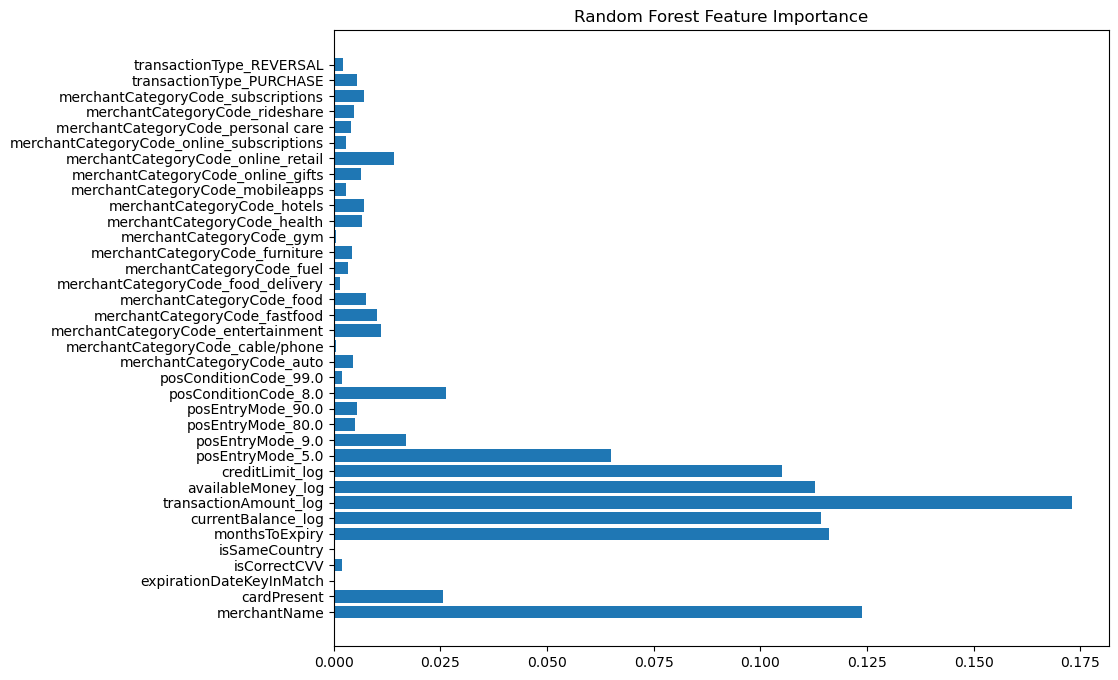

In [136]:
#plot feature importance for RF
plt.figure(figsize=(10, 8))
plt.barh(X_train_resampled.columns, feature_importances_rf)
plt.title('Random Forest Feature Importance')
plt.show()

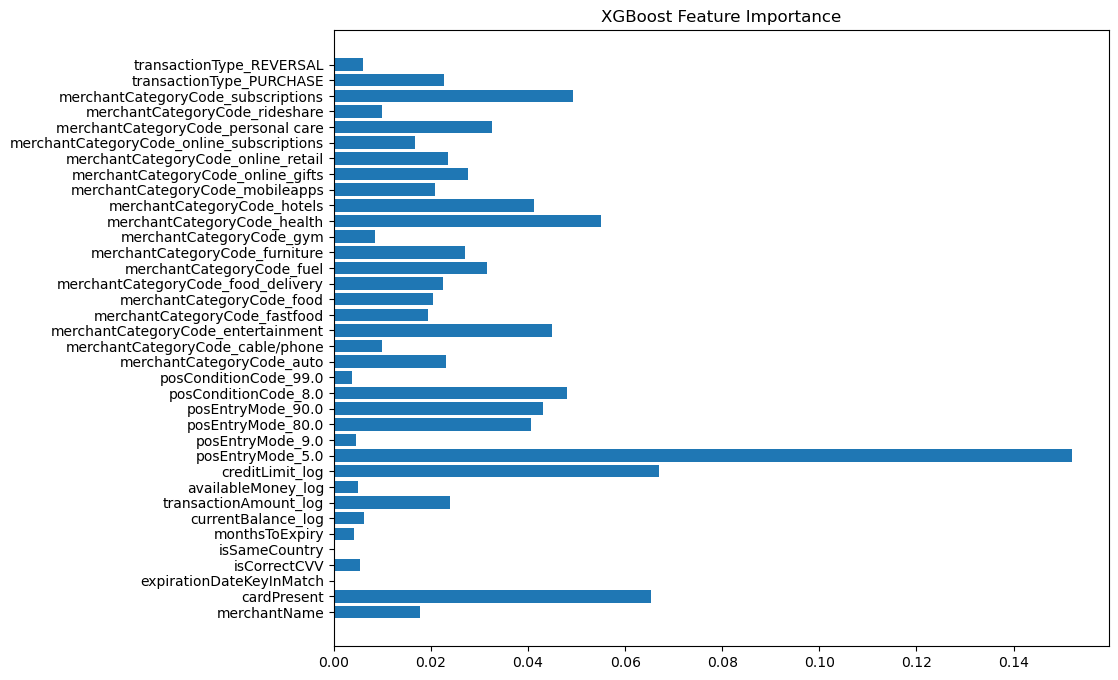

In [137]:
#plot feature importance for XGboost
plt.figure(figsize=(10, 8))
plt.barh(X_train_resampled.columns, feature_importances_xgb)
plt.title('XGBoost Feature Importance')
plt.show()

In [138]:
#we need to put isFraud coulmn back in to correlate against
X_train_resampled['isFraud'] = y_train_resampled

#calculate the correlation matrix for SMOTENC sampled data
corr_matrix_smote_nc = X_train_resampled.corr()['isFraud'].sort_values(ascending=False)

print("\nCorrelation of features with isFraud (SMOTENC dataset):")
print(corr_matrix_smote_nc)


Correlation of features with isFraud (SMOTENC dataset):
isFraud                                      1.000000
transactionAmount_log                        0.272303
merchantCategoryCode_online_retail           0.169064
posEntryMode_9.0                             0.168370
transactionType_PURCHASE                     0.095512
merchantName                                 0.087779
merchantCategoryCode_online_gifts            0.052286
currentBalance_log                           0.044872
merchantCategoryCode_rideshare               0.042555
isCorrectCVV                                 0.029534
creditLimit_log                              0.013205
isSameCountry                                0.006508
monthsToExpiry                               0.003686
availableMoney_log                          -0.001812
expirationDateKeyInMatch                    -0.012654
merchantCategoryCode_cable/phone            -0.024144
posConditionCode_99.0                       -0.027359
merchantCategoryCode_gym 

In [139]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#scale the SMOTENC sampled data
scaler = MinMaxScaler()

#ensure to drop the isFraud column from the features before scaling
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled.drop(columns=['isFraud']))

#get the feature names
feature_names_resampled = X_train_resampled.drop(columns=['isFraud']).columns

# apply the Chi-squared test
chi2_resampled, p_values_resampled = chi2(X_train_resampled_scaled, y_train_resampled)

print("\nChi-squared test for SMOTENC dataset:")
for i, p_val in enumerate(p_values_resampled):
    print(f"Feature '{feature_names_resampled[i]}': Chi2 value = {chi2_resampled[i]}, p-value = {p_val}")
    
#Drop the isFraud column
X_train_resampled = X_train_resampled.drop(columns=['isFraud'])


Chi-squared test for SMOTENC dataset:
Feature 'merchantName': Chi2 value = 162.33176059921715, p-value = 3.501136393243597e-37
Feature 'cardPresent': Chi2 value = 2171.552845225268, p-value = 0.0
Feature 'expirationDateKeyInMatch': Chi2 value = 15.113878724681138, p-value = 0.00010121642356244261
Feature 'isCorrectCVV': Chi2 value = 0.598382894991756, p-value = 0.43919569090015365
Feature 'isSameCountry': Chi2 value = 0.0003388053937574752, p-value = 0.9853144337673385
Feature 'monthsToExpiry': Chi2 value = 0.1893121678298233, p-value = 0.663489711788876
Feature 'currentBalance_log': Chi2 value = 10.605490588150387, p-value = 0.001127523372800838
Feature 'transactionAmount_log': Chi2 value = 377.61948125100747, p-value = 4.1043256718428843e-84
Feature 'availableMoney_log': Chi2 value = 0.007638171648062799, p-value = 0.9303562447601823
Feature 'creditLimit_log': Chi2 value = 1.3038515741375836, p-value = 0.25351088601962635
Feature 'posEntryMode_5.0': Chi2 value = 4853.582399805293, p

In [140]:
#based on the above scores we can see these groups arent adding much value and will increase noise in our model
features_to_drop = ['isSameCountry', 'monthsToExpiry', 'expirationDateKeyInMatch', 
                'isCorrectCVV', 'availableMoney_log', 'merchantCategoryCode_cable/phone']

X_train_cleaned = X_train_resampled.drop(columns=features_to_drop)
X_test_cleaned = X_test.drop(columns=features_to_drop)

#ensuring that we have the same shape for the train and test so that we can build our models
print("Shape of X_train before dropping:", X_train_resampled.shape)
print("Shape of X_train after dropping:", X_train_cleaned.shape)
print("Shape of X_test before dropping:", X_test.shape)
print("Shape of X_test after dropping:", X_test_cleaned.shape)

#making sure our merchanname column is encoded
X_train_resampled['merchantName'] = label_encoder.fit_transform(X_train_resampled['merchantName'])
X_test_cleaned['merchantName'] = label_encoder.fit_transform(X_test_cleaned['merchantName'])

Shape of X_train before dropping: (94456, 36)
Shape of X_train after dropping: (94456, 30)
Shape of X_test before dropping: (30000, 36)
Shape of X_test after dropping: (30000, 30)


In [141]:
# Basic Model building  

Basic Random Forest, XGBoost, LightGBM and CatBoost

Training Random Forest...
Random Forest Metrics(Regular):
Accuracy: 0.7518
F1 Score: 0.2918
Precision: 0.2034
Recall: 0.5163
ROC AUC: 0.7308


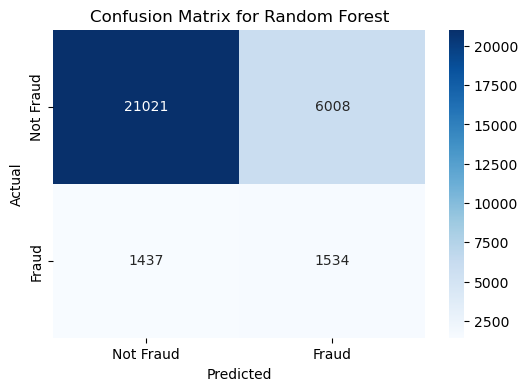


Classification Report for Random Forest:
               precision    recall  f1-score   support

       False       0.94      0.78      0.85     27029
        True       0.20      0.52      0.29      2971

    accuracy                           0.75     30000
   macro avg       0.57      0.65      0.57     30000
weighted avg       0.86      0.75      0.79     30000


Training XGBoost...
XGBoost Metrics(Regular):
Accuracy: 0.6917
F1 Score: 0.2749
Precision: 0.1792
Recall: 0.5900
ROC AUC: 0.7274


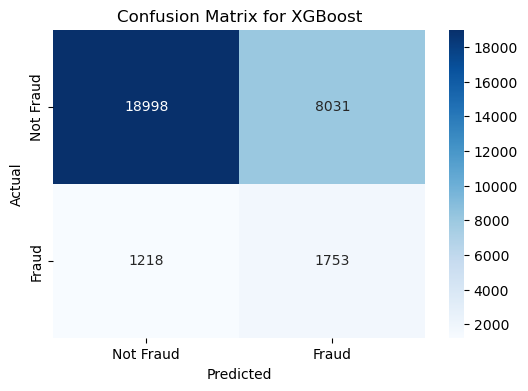


Classification Report for XGBoost:
               precision    recall  f1-score   support

       False       0.94      0.70      0.80     27029
        True       0.18      0.59      0.27      2971

    accuracy                           0.69     30000
   macro avg       0.56      0.65      0.54     30000
weighted avg       0.86      0.69      0.75     30000


Training LightGBM...
LightGBM Metrics(Regular):
Accuracy: 0.8040
F1 Score: 0.3343
Precision: 0.2519
Recall: 0.4968
ROC AUC: 0.7597


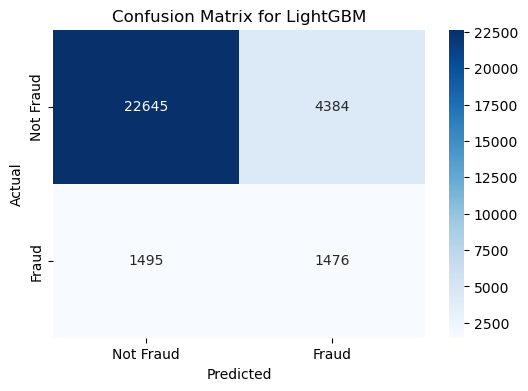


Classification Report for LightGBM:
               precision    recall  f1-score   support

       False       0.94      0.84      0.89     27029
        True       0.25      0.50      0.33      2971

    accuracy                           0.80     30000
   macro avg       0.59      0.67      0.61     30000
weighted avg       0.87      0.80      0.83     30000


Training CatBoost...
CatBoost Metrics(Regular):
Accuracy: 0.6773
F1 Score: 0.2782
Precision: 0.1787
Recall: 0.6281
ROC AUC: 0.7277


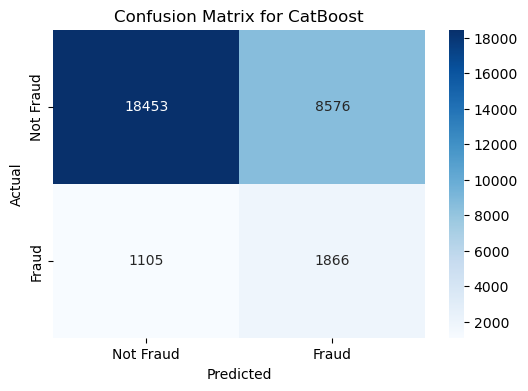


Classification Report for CatBoost:
               precision    recall  f1-score   support

       False       0.94      0.68      0.79     27029
        True       0.18      0.63      0.28      2971

    accuracy                           0.68     30000
   macro avg       0.56      0.66      0.54     30000
weighted avg       0.87      0.68      0.74     30000



In [142]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#initialize models and organiz it better in a dictionary
#ALSO PLEASE MAKE SURE TO USE A GPU WHILE RUNNING!!!
#if no gpu please comment this part of the code and run the other
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
#     "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
#     "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
# }


#No GPU
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

print("Basic Random Forest, XGBoost, LightGBM and CatBoost")
#train and evaluate each of the 4 models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    model.fit(X_train_cleaned, y_train_resampled)
    y_pred = model.predict(X_test_cleaned)
    y_pred_proba = model.predict_proba(X_test_cleaned)[:, 1]  # For ROC AUC

    #calculate eval metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Metrics(Regular):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    #build confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    #report for precision, recall, f1-score
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

In [143]:
# pip install catboost


In [144]:
# Cross validation for ROC and F1 score
# in our case we are using stratified K fold because it Preserves the class distribution in each fold, matching the overall dataset. (Ensures that each fold has the same proportion of classes as the original dataset.)

In [145]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

#initialize Stratified Cross-Validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [146]:
#function to perform cross-validation and print results
def evaluate_model_with_cv(model, model_name, X_train, y_train):
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    
    #perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{model_name} Cross-Validated ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#evaluate each model using cv
for model_name, model in models.items():
    evaluate_model_with_cv(model, model_name, X_train_cleaned, y_train_resampled)


Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated ROC AUC: 0.9179 ± 0.0025

Evaluating XGBoost with Cross-Validation...
XGBoost Cross-Validated ROC AUC: 0.9264 ± 0.0026

Evaluating LightGBM with Cross-Validation...
LightGBM Cross-Validated ROC AUC: 0.9291 ± 0.0029

Evaluating CatBoost with Cross-Validation...
CatBoost Cross-Validated ROC AUC: 0.9343 ± 0.0025


In [147]:
#function to perform cross-validation and print results
def evaluate_model_with_cv(model, model_name, X_train, y_train):
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    print(f"{model_name} Cross-Validated F1: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#evaluate each model using cv
for model_name, model in models.items():
    evaluate_model_with_cv(model, model_name, X_train_cleaned, y_train_resampled)


Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated F1: 0.7769 ± 0.0062

Evaluating XGBoost with Cross-Validation...
XGBoost Cross-Validated F1: 0.7878 ± 0.0020

Evaluating LightGBM with Cross-Validation...
LightGBM Cross-Validated F1: 0.7918 ± 0.0040

Evaluating CatBoost with Cross-Validation...
CatBoost Cross-Validated F1: 0.8009 ± 0.0025


In [148]:
# Thresold tuning is persomed to improve/balance the metrics such as  presision, recall
# In binary classification, most machine learning models output a probability score for each class (e.g., the probability that a sample belongs to the positive class). By default, the decision threshold is set to 0.5: if the predicted probability is greater than or equal to 0.5, the sample is classified as the positive class; otherwise, it is classified as the negative class.
# Since out data is not balanaced (unequal distributuion ratio between fraud and not fraud), we need to alter/change the probability score. Hence we are using Threshold tuning 


Starting hyperparameter tuning for XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.6; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   6.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   6.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   7.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:56:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   6.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   6.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   7.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   2.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   7.8s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   8.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.6; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   1.8s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.6; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   5.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=1.0; total time=   3.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=1.0; total time=   3.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   5.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.6; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=500, subsample=1.0; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   4.3s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=1.0; total time=   3.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=1.0; total time=   3.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, subsample=1.0; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   5.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   6.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   6.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.6; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   4.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.6; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:57:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.8; total time=   6.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, subsample=0.

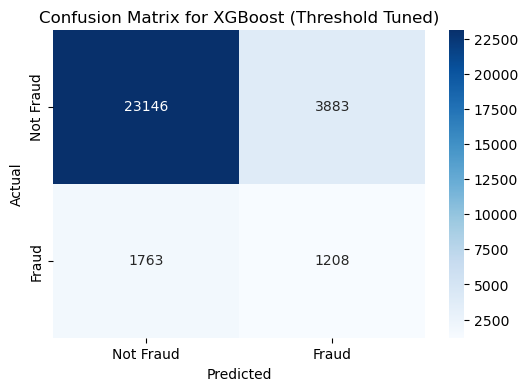

In [149]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform Randomized Search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search to the data
print("\nStarting hyperparameter tuning for XGBoost...")
random_search.fit(X_train_cleaned, y_train_resampled)

# Best hyperparameters
print("\nBest Hyperparameters:")
print(random_search.best_params_)

# Train the model with best hyperparameters
best_xgb = random_search.best_estimator_

# Make predictions
y_pred_proba = best_xgb.predict_proba(X_test_cleaned)[:, 1]

# Threshold Tuning
thresholds = np.arange(0.1, 1.0, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# Find the best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {max(f1_scores):.4f}")

# Final prediction using the best threshold
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Model Metrics (After Threshold Tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {max(f1_scores):.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for XGBoost (Threshold Tuned)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [150]:
# Threshold Tuning 

Best Threshold: 0.75
Best F1-Score: 0.2997


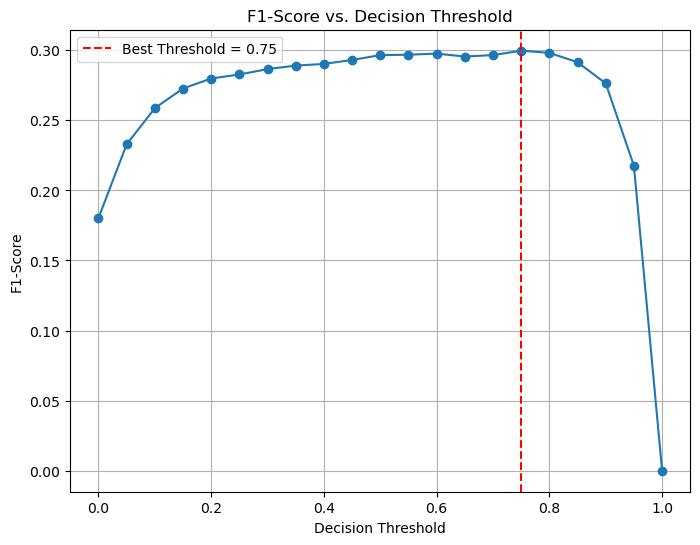


Final Model Metrics (After Threshold Tuning):
Accuracy: 0.8118
Precision: 0.2373
Recall: 0.4066
F1 Score: 0.2997
ROC AUC: 0.7431


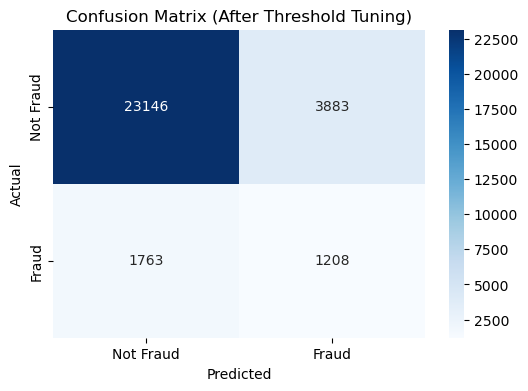

In [151]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted probabilities from the trained model
y_pred_proba = best_xgb.predict_proba(X_test_cleaned)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

# Iterate through thresholds and calculate F1-score
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# Find the threshold with the best F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {best_f1_score:.4f}")

# Plot F1-score vs. Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('F1-Score vs. Decision Threshold')
plt.xlabel('Decision Threshold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid()
plt.show()

# Final predictions using the best threshold
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Final evaluation metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Model Metrics (After Threshold Tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {best_f1_score:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix (After Threshold Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [152]:
# LightGBM Hyperparameter tuning, cross validation and threshold tuning 


Starting hyperparameter tuning for LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25188, number of negative: 50376
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25188, number of negative: 50377
[LightGBM] [Info] Number of positive: 25188, number of negative: 50377
[LightGBM] [Info] Number of positive: 25188, number of negative: 50377
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 25188, number of negative: 50377
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027592 seconds.
You can set `force_row_wise=tru

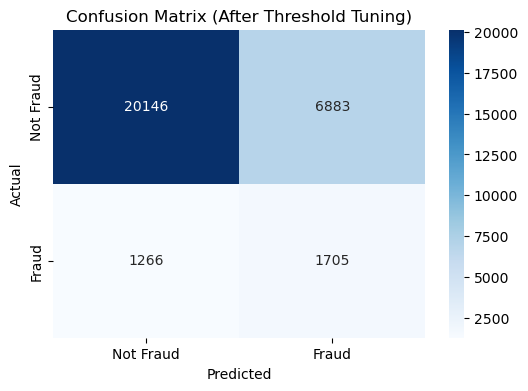

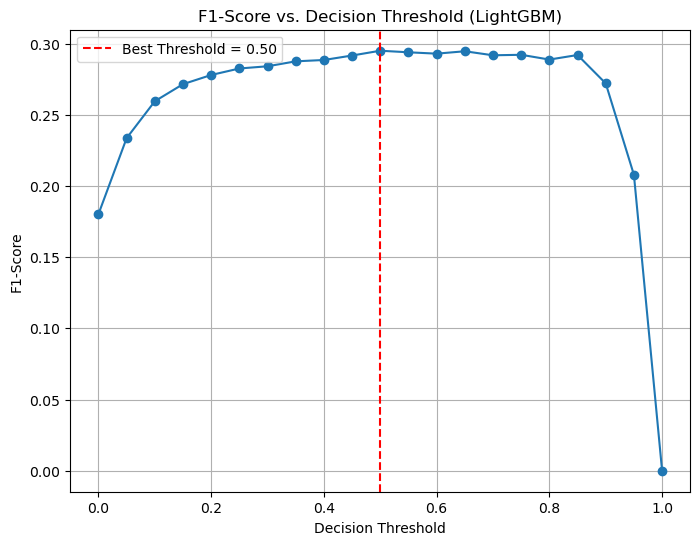

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from lightgbm import LGBMClassifier

# Step 1: Define the hyperparameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [-1, 5, 10, 20],
    'num_leaves': [31, 50, 100],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Step 2: Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Step 3: Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 5: Fit RandomizedSearchCV
print("\nStarting hyperparameter tuning for LightGBM...")
random_search.fit(X_train_cleaned, y_train_resampled)

# Best hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Step 6: Train the best model on the full training set
best_lgbm = random_search.best_estimator_

# Step 7: Predict probabilities on the test set
y_pred_proba = best_lgbm.predict_proba(X_test_cleaned)[:, 1]

# Step 8: Threshold tuning to optimize F1-score
thresholds = np.arange(0.0, 1.05, 0.05)
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# Find the best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"\nBest Threshold: {best_threshold:.2f}")
print(f"Best F1-Score: {best_f1_score:.4f}")

# Step 9: Final predictions using the best threshold
y_pred_final = (y_pred_proba >= best_threshold).astype(int)

# Step 10: Evaluate the final model
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Model Metrics (After Threshold Tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {best_f1_score:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix (After Threshold Tuning)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot F1-Score vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.title('F1-Score vs. Decision Threshold (LightGBM)')
plt.xlabel('Decision Threshold')
plt.ylabel('F1-Score')
plt.legend()
plt.grid()
plt.show()


In [154]:
# catboos hypertuning and cv

PyTorch not installed. Defaulting to CPU.

Starting hyperparameter tuning for CatBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bagging_temperature=0.5, border_count=64, depth=4, iterations=1500, l2_leaf_reg=3, learning_rate=0.2, random_strength=5, scale_pos_weight=2; total time=  48.0s
[CV] END bagging_temperature=0.5, border_count=64, depth=4, iterations=1500, l2_leaf_reg=3, learning_rate=0.2, random_strength=5, scale_pos_weight=2; total time=  48.3s
[CV] END bagging_temperature=0.5, border_count=64, depth=4, iterations=1500, l2_leaf_reg=3, learning_rate=0.2, random_strength=5, scale_pos_weight=2; total time=  50.6s
[CV] END bagging_temperature=0.2, border_count=32, depth=6, iterations=1500, l2_leaf_reg=7, learning_rate=0.2, random_strength=2, scale_pos_weight=5; total time=  57.1s
[CV] END bagging_temperature=0.5, border_count=64, depth=4, iterations=1500, l2_leaf_reg=3, learning_rate=0.2, random_strength=5, scale_pos_weight=2; total time=  57.3s
[CV

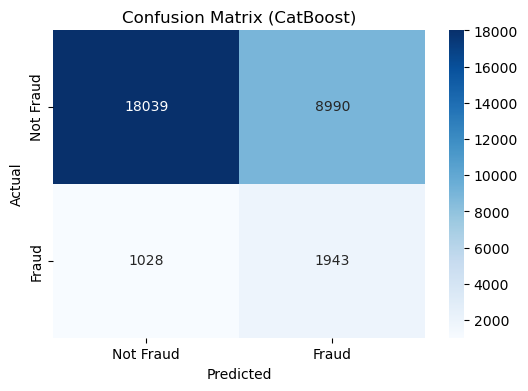

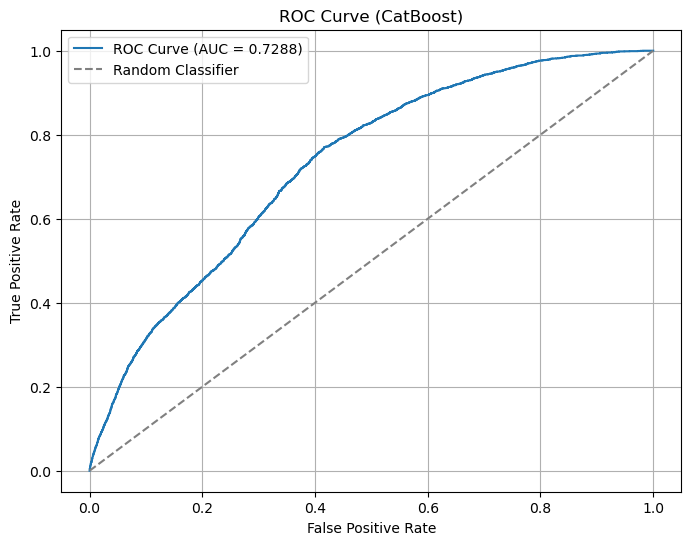

In [155]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check for GPU availability
try:
    import torch
    gpu_available = torch.cuda.is_available()
    task_type = "GPU" if gpu_available else "CPU"
    print(f"GPU Available: {gpu_available}")
except ImportError:
    task_type = "CPU"
    print("PyTorch not installed. Defaulting to CPU.")

# Step 2: Define the hyperparameter grid for CatBoost
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0.2, 0.5, 1.0],
    'random_strength': [1, 2, 5],
    'border_count': [32, 64, 128],
    'scale_pos_weight': [1, 2, 5]  # Useful for imbalanced datasets
}

# Step 3: Initialize the CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0, task_type=task_type)

# Step 4: Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 6: Fit RandomizedSearchCV
print("\nStarting hyperparameter tuning for CatBoost...")
random_search.fit(X_train_cleaned, y_train_resampled)

# Best hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Step 7: Train the best model on the full training set
best_catboost = random_search.best_estimator_

# Step 8: Predict probabilities on the test set
y_pred_proba = best_catboost.predict_proba(X_test_cleaned)[:, 1]

# Step 9: Final predictions using the default threshold (0.5)
y_pred = best_catboost.predict(X_test_cleaned)

# Step 10: Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nFinal Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix (CatBoost)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (CatBoost)')
plt.legend()
plt.grid()
plt.show()
